**Name :- Hardik Prashant Kanitkar**

***Amazon Prime Video is an American subscription-based streaming service owned by Amazon. It offers Amazon Originals, licensed content, live sports, and video rentals. Launched as Amazon Unbox in 2006, it was later renamed Amazon Instant Video before becoming Prime Video. The service operates worldwide, requiring a Prime subscription in some regions like India, France, and Canada, while available as a stand-alone service in others like the US, UK, and Germany. It expanded globally on December 14, 2016, except in China, Cuba, Iran, North Korea, Sudan, and Syria. Users can subscribe to additional channels via Amazon Channels. Prime Video became part of Amazon MGM Studios and joined the Motion Picture Association (MPA) on October 1, 2024.***



---



**We will Perform EDA on the Amazon Prime Dataset and derive Some insights from it.**

In [ ]:
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**We will first load the Dataset CSV files namely titles.csv and credits.csv and Merge both files using merge method of Pandas and using an Outer join So that we retain all Details from Both the csv Files.**

In [ ]:
df1 = pd.read_csv('/content/titles.csv')
df2 = pd.read_csv('/content/credits.csv')

In [ ]:
merged_df = df1.merge(df2, on="id", how="outer")

In [ ]:
merged_df.to_csv('merged_data.csv', index=False)

In [ ]:
merged_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm100001,The Lucky Texan,MOVIE,"Jerry Mason, a young Texan, and Jake Benson, a...",1934,NaN,61,"['western', 'action', 'romance']",['US'],NaN,tt0025440,5.6,1213.0,4.079,4.7,25629.0,John Wayne,Jerry Mason,ACTOR
1,tm100001,The Lucky Texan,MOVIE,"Jerry Mason, a young Texan, and Jake Benson, a...",1934,NaN,61,"['western', 'action', 'romance']",['US'],NaN,tt0025440,5.6,1213.0,4.079,4.7,578138.0,Barbara Sheldon,Betty Benson,ACTOR
2,tm100001,The Lucky Texan,MOVIE,"Jerry Mason, a young Texan, and Jake Benson, a...",1934,NaN,61,"['western', 'action', 'romance']",['US'],NaN,tt0025440,5.6,1213.0,4.079,4.7,27356.0,Lloyd Whitlock,Harris,ACTOR
3,tm100001,The Lucky Texan,MOVIE,"Jerry Mason, a young Texan, and Jake Benson, a...",1934,NaN,61,"['western', 'action', 'romance']",['US'],NaN,tt0025440,5.6,1213.0,4.079,4.7,100231.0,George 'Gabby' Hayes,Jake 'Grandy' Benson,ACTOR
4,tm100001,The Lucky Texan,MOVIE,"Jerry Mason, a young Texan, and Jake Benson, a...",1934,NaN,61,"['western', 'action', 'romance']",['US'],NaN,tt0025440,5.6,1213.0,4.079,4.7,13327.0,Yakima Canutt,Joe Cole,ACTOR


In [ ]:
merged_df.tail()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
125349,ts98217,Baby u,SHOW,Class is in session! Join BabyU for all the ba...,2011,TV-Y,24,[],['US'],1.0,tt6963828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125350,ts98222,Music and Sounds with Bonnie Bear,SHOW,"Together with her best friend, Mr. Gramophone,...",2006,TV-Y,26,[],[],1.0,tt6963174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125351,ts98387,ABC Galaxy: New Space Adventures,SHOW,Meet Giggs and Hugg - two adorable friends tha...,2015,TV-G,13,[],[],1.0,tt6954612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125352,ts98392,Technological Marvels of the Ancient World,SHOW,Impossible discoveries have been made. Some of...,2005,TV-G,79,['history'],[],1.0,tt6953902,7.8,10.0,NaN,NaN,NaN,NaN,NaN,NaN
125353,ts9913,Crime Inc.,SHOW,The True Story Of The Mafia.,1984,TV-MA,25,"['documentation', 'european']",['GB'],1.0,tt0938980,8.5,147.0,2.089,NaN,9234.0,Martin Short,Narrator,ACTOR


We will Start Cleaning our Dataset by removing special characters like square brackets and Apostrophe from "genres" and production_countries" Column for better Analysis.

In [ ]:
# Replace NaN values first
merged_df["genres"] = merged_df["genres"].fillna("Not Available").str.replace(r"[\[\]']", "", regex=True)
merged_df["production_countries"] = merged_df["production_countries"].fillna("Not Available").str.replace(r"[\[\]']", "", regex=True)

# Replace empty strings (if any) after removing brackets
merged_df["genres"] = merged_df["genres"].replace("", "Not Available")
merged_df["production_countries"] = merged_df["production_countries"].replace("", "Not Available")

In [ ]:
merged_df.tail()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
125349,ts98217,Baby u,SHOW,Class is in session! Join BabyU for all the ba...,2011,TV-Y,24,Not Available,US,1.0,tt6963828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125350,ts98222,Music and Sounds with Bonnie Bear,SHOW,"Together with her best friend, Mr. Gramophone,...",2006,TV-Y,26,Not Available,Not Available,1.0,tt6963174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125351,ts98387,ABC Galaxy: New Space Adventures,SHOW,Meet Giggs and Hugg - two adorable friends tha...,2015,TV-G,13,Not Available,Not Available,1.0,tt6954612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125352,ts98392,Technological Marvels of the Ancient World,SHOW,Impossible discoveries have been made. Some of...,2005,TV-G,79,history,Not Available,1.0,tt6953902,7.8,10.0,NaN,NaN,NaN,NaN,NaN,NaN
125353,ts9913,Crime Inc.,SHOW,The True Story Of The Mafia.,1984,TV-MA,25,"documentation, european",GB,1.0,tt0938980,8.5,147.0,2.089,NaN,9234.0,Martin Short,Narrator,ACTOR


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125354 entries, 0 to 125353
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    125354 non-null  object 
 1   title                 125354 non-null  object 
 2   type                  125354 non-null  object 
 3   description           125163 non-null  object 
 4   release_year          125354 non-null  int64  
 5   age_certification     56857 non-null   object 
 6   runtime               125354 non-null  int64  
 7   genres                125354 non-null  object 
 8   production_countries  125354 non-null  object 
 9   seasons               8501 non-null    float64
 10  imdb_id               119978 non-null  object 
 11  imdb_score            118987 non-null  float64
 12  imdb_votes            118957 non-null  float64
 13  tmdb_popularity       124800 non-null  float64
 14  tmdb_score            114263 non-null  float64
 15  

The below Code tells us The Percentage of null Values in Columns of Dataset.

In [ ]:
missing_percentages = {col: f"{int(merged_df[col].isnull().sum() / len(merged_df) * 100)}%" for col in merged_df.columns}
missing_df = pd.DataFrame(list(missing_percentages.items()), columns=['Column', 'Missing Percentage'])
print(missing_df)

                  Column Missing Percentage
0                     id                 0%
1                  title                 0%
2                   type                 0%
3            description                 0%
4           release_year                 0%
5      age_certification                54%
6                runtime                 0%
7                 genres                 0%
8   production_countries                 0%
9                seasons                93%
10               imdb_id                 4%
11            imdb_score                 5%
12            imdb_votes                 5%
13       tmdb_popularity                 0%
14            tmdb_score                 8%
15             person_id                 0%
16                  name                 0%
17             character                13%
18                  role                 0%


**We will use .describe() to Get some Statistical insights.**

In [ ]:
merged_df.describe(include='all')

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
count,125354,125354,125354,125163,125354.000000,56857,125354.00000,125354,125354,8501.000000,119978,118987.000000,1.189570e+05,124800.000000,114263.000000,1.243470e+05,124347,108040,124347
unique,9868,9737,2,9734,NaN,11,NaN,2028,497,NaN,9201,NaN,NaN,NaN,NaN,NaN,79758,71097,2
top,tm458582,Coming 2 America,MOVIE,Prince Akeem Joffer is set to become King of Z...,NaN,R,NaN,drama,US,NaN,tt6802400,NaN,NaN,NaN,NaN,NaN,George 'Gabby' Hayes,Himself,ACTOR
freq,137,137,116853,137,NaN,25941,NaN,10002,69636,NaN,137,NaN,NaN,NaN,NaN,NaN,49,1540,115952
mean,NaN,NaN,NaN,NaN,1996.374715,NaN,95.30792,NaN,NaN,2.335372,NaN,5.970856,2.311206e+04,10.134483,5.993077,4.062528e+05,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,27.758800,NaN,30.39349,NaN,NaN,3.164860,NaN,1.243967,8.816389e+04,40.666765,1.322900,5.614483e+05,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1912.000000,NaN,1.00000,NaN,NaN,1.000000,NaN,1.100000,5.000000e+00,0.000011,0.800000,1.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1983.000000,NaN,82.00000,NaN,NaN,1.000000,NaN,5.200000,2.790000e+02,1.858000,5.300000,3.899600e+04,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2009.000000,NaN,93.00000,NaN,NaN,1.000000,NaN,6.100000,1.227000e+03,3.864000,6.100000,1.339340e+05,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2017.000000,NaN,109.00000,NaN,NaN,2.000000,NaN,6.800000,7.039000e+03,8.787000,6.800000,5.711600e+05,NaN,NaN,NaN


The .describe() function provides a summary of the dataset's statistical properties:

**Count:** Shows the number of non-null values for each column. Some columns have missing values (e.g., seasons, age_certification).


**Unique Values:** Indicates the number of unique entries in categorical columns (e.g., title, genres, production_countries).

**Top & Frequency:** Displays the most common entry and its occurrence in categorical columns. For example, the most frequent movie is Coming 2 America.

**Mean & Std:** The average (mean) and spread (std) for numerical columns like release_year, runtime, imdb_score, etc.

**Min, 25%, 50%, 75%, Max:** Shows the distribution range for numerical data. The oldest movie dates back to 1912, and the highest IMDb score recorded is 9.9.

**We will Analyse all columns in Detail in Univariate Analysis**



---



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## **Univariate Analysis**

---



**Lets Start with Our Univariate Analysis by Analysing Columns from Left to Right in our Dataset**

---



We will first find Out how many unique Movies/Shows we have in our Dataset

In [ ]:
temp = merged_df['title'].nunique()
print(f"We have {temp} of Unique Titles in Our Dataset.")

We have 9737 of Unique Titles in Our Dataset.


We start analysing the column "type" and visualize using Barplot as to
how many Shows Classify as "Movie" and how many As Shows.

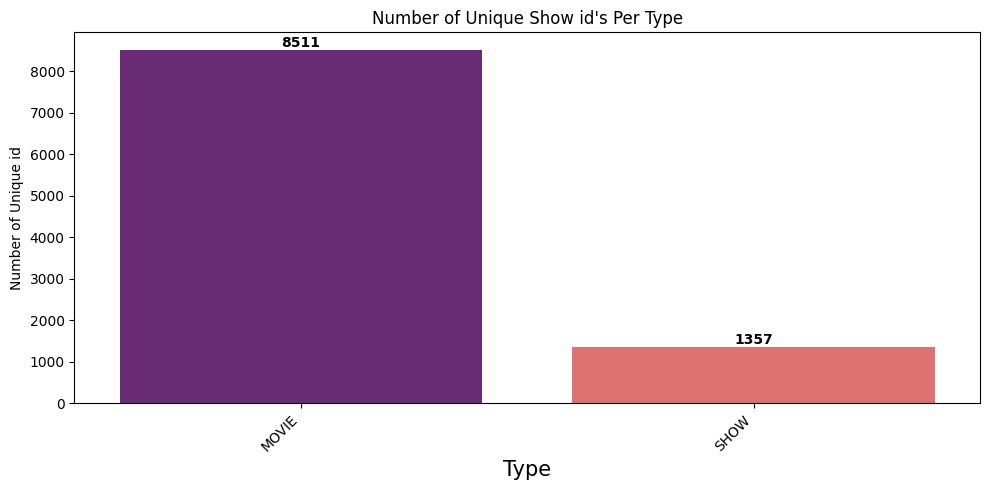

In [ ]:
type_unique_count = merged_df.groupby('type')['id'].nunique().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=type_unique_count.index, y=type_unique_count.values ,palette="magma")
plt.xlabel("Type" , fontsize = 15)
plt.ylabel("Number of Unique id")
plt.title("Number of Unique Show id's Per Type")
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(type_unique_count.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom',fontsize=10 , fontweight = 'bold')

plt.tight_layout()
plt.show()

**As the Above Graph is Self Explanatory , we have 8511 Unique Movies and 1357 Shows Data in Our Dataset.**


---



Now we Visualize next Column named "release_year" and Try to derive some insights. First we will use .unique() method to get the unique years in this Dataset.

In [ ]:
merged_df['release_year'].unique()

array([1934, 2021, 2020, 2022, 1919, 2019, 2010, 1970, 1938, 1953, 1980,
       1962, 1991, 2003, 1956, 2018, 2008, 1929, 2017, 1995, 1920, 2011,
       2015, 2007, 1996, 2016, 1999, 2014, 1994, 2002, 1974, 1955, 2004,
       1954, 2001, 1973, 1943, 1978, 1936, 1971, 1932, 1937, 1986, 2013,
       2006, 1967, 1987, 1957, 1975, 1968, 1941, 1985, 1992, 1979, 1942,
       1921, 1981, 1926, 1961, 1958, 2009, 1951, 1989, 1933, 1950, 1976,
       1946, 1988, 1925, 1952, 1972, 1915, 1945, 2012, 1977, 1990, 1939,
       1969, 1935, 1948, 2005, 1959, 1914, 1984, 1927, 2000, 1912, 1964,
       1993, 1965, 1997, 1998, 1966, 1982, 1940, 1983, 1949, 1947, 1963,
       1944, 1916, 1924, 1928, 1923, 1930, 1960, 1931, 1917, 1918, 1922])

As observed above, the release years span from the early 1900s to the 2020s. To analyze this distribution, we will first group or bin the years into intervals and then visualize the number of shows and movies released within each time span.

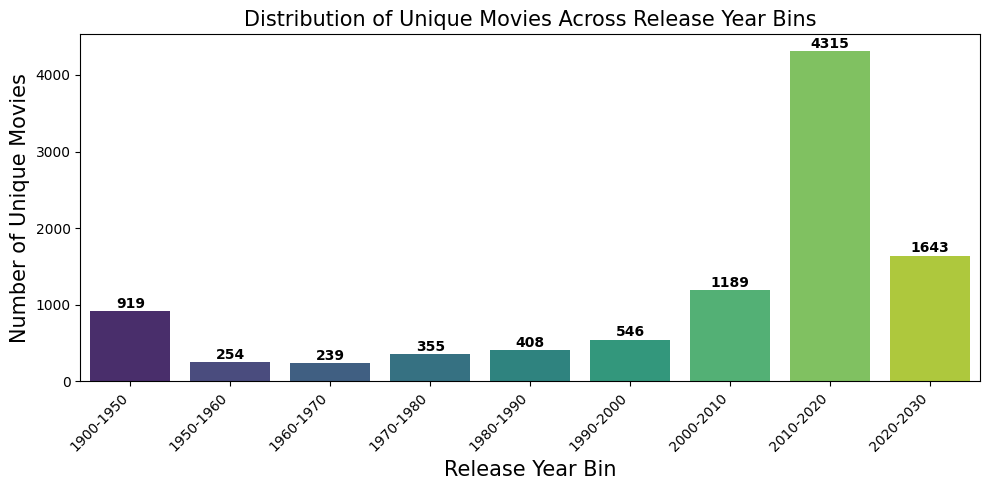

In [ ]:
bins = [1900, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
labels = ['1900-1950', '1950-1960', '1960-1970', '1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2020', '2020-2030']

merged_df['release_year_bin'] = pd.cut(merged_df['release_year'], bins=bins, labels=labels, right=False)

release_year_bin_counts = merged_df.groupby('release_year_bin')['id'].nunique().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=release_year_bin_counts.index, y=release_year_bin_counts.values, palette="viridis")
plt.xlabel("Release Year Bin", fontsize=15)
plt.ylabel("Number of Unique Movies", fontsize=15)
plt.title("Distribution of Unique Movies Across Release Year Bins", fontsize=15)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(release_year_bin_counts.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

As we see from above Graph , the 1900-1950 Interval has 919 movies released. Then the next decades see Comparatively few releases , then we again see a spurt in new releases in the 2000-2010 decade , that is at the advent of 21st Century. **The decade between 2010-2020 Expereince Sharp increase in New Release Give Penetration of Mobile Phones and Internet among Common masses and introduction of OTT or Streaming services and its acceptance among massess.**


---



Now we analyse the "age_certification" column. A movie rating system
categorizes films based on their suitability for different audiences. It considers factors like content related to sex, violence, substance use, and strong language, helping viewers, especially children and teenagers, choose appropriate films.

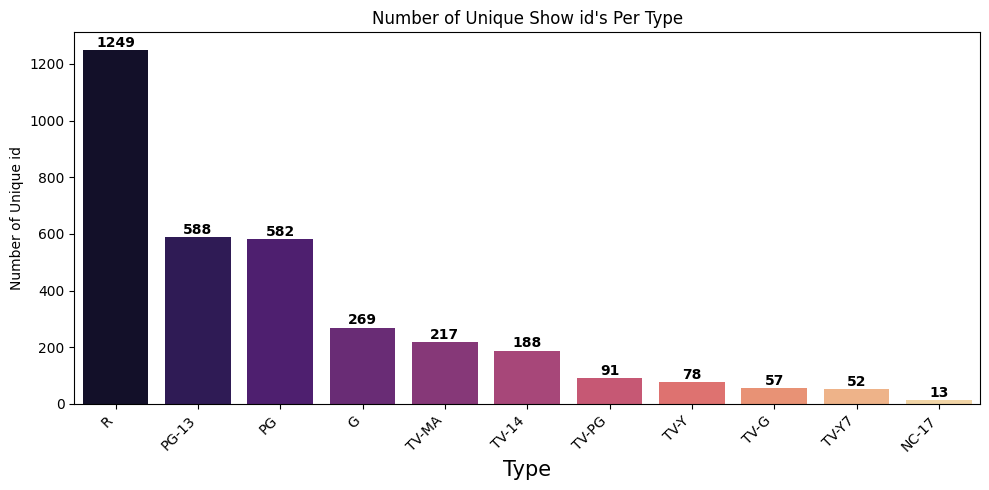

In [ ]:
age_certification_unique_count = merged_df.groupby('age_certification')['id'].nunique().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=age_certification_unique_count.index, y=age_certification_unique_count.values ,palette="magma")
plt.xlabel("Type" , fontsize = 15)
plt.ylabel("Number of Unique id")
plt.title("Number of Unique Show id's Per Type")
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(age_certification_unique_count.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom',fontsize=10 , fontweight = 'bold')

plt.tight_layout()
plt.show()

**As we see , R rated movies (i.e a movie contains adult material and is not suitable for children) are in Majority**. Next in Line are PG-13 and PG rated.


---



Now we analyse "runtime" column. Just as we did with "release_year" , we will use .unique() method to get unique Runtime Values.

In [ ]:
merged_df['runtime'].unique()

array([ 61,  99,  81,  70,  96,  77, 148,  90, 138,  89,  64,  95, 111,
        63,  84, 146,  65,  45,  71,  62,  75,  55,  83, 139,  87, 100,
        66,  51,  80, 108, 144, 102,  86, 142,  88, 122,  91,  79, 172,
        76,  72, 104,  60, 116,  94,  98, 115, 101, 155,  59, 126, 107,
       110,  69,  53,  33,  74, 124, 119, 132, 152, 136,  85, 151, 105,
        44, 118,  42, 114, 133, 125, 120,  82, 130, 103, 143,  97,  50,
        93, 121,  78, 160,  30, 127, 128, 129,  58, 135, 113,   6,  54,
        47,  92, 112,  52,  56,  73,  23, 157,  57, 134,  49, 109,  32,
       106,  67,  68,  48, 117, 149,  46, 141, 145,  31, 173, 131,  43,
        22, 123,  21, 154, 177, 174, 150,  24,  25, 162, 137,  36,  38,
        16,  40, 164, 328,  28,  41,  39, 185, 158, 182, 163, 180, 140,
       153, 156,  27,  34, 300,  26, 171, 195, 167, 165, 197,  20, 228,
       179, 189, 186, 147, 175, 168, 159, 290, 166,   7, 170,  19, 169,
       194, 178,   1, 181, 161, 193, 540,  10, 216,   2, 176, 18

So as we see , the spread of "Runtime Column" is also very Wide. Just as we did with "release_year" , we will first group or bin the Runtime into intervals and then visualize the number of shows and movies released within each time span.

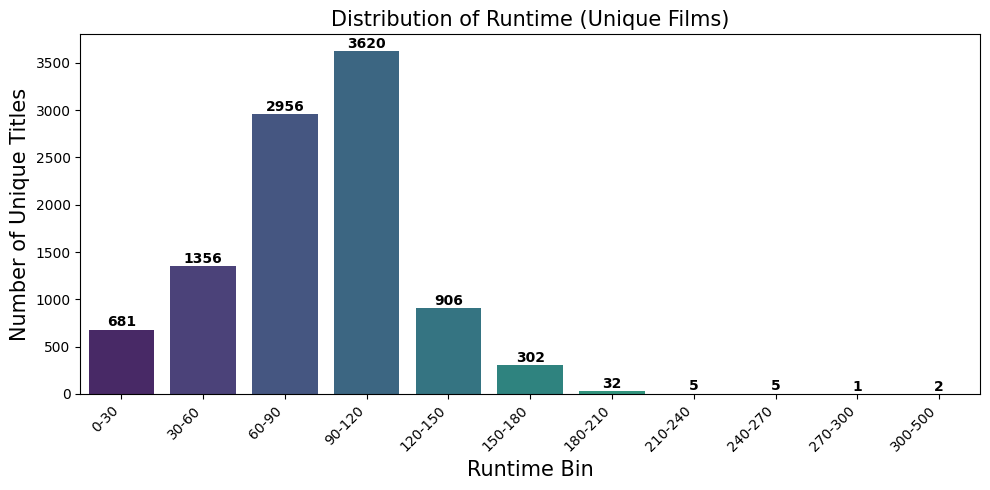

In [ ]:
bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 500]
labels = ['0-30', '30-60', '60-90', '90-120', '120-150', '150-180',
          '180-210', '210-240', '240-270', '270-300', '300-500']

merged_df['runtime_bin'] = pd.cut(merged_df['runtime'], bins=bins, labels=labels, right=False)

runtime_bin_counts = merged_df.groupby('runtime_bin')['id'].nunique().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=runtime_bin_counts.index, y=runtime_bin_counts.values, palette="viridis")

plt.xlabel("Runtime Bin", fontsize=15)
plt.ylabel("Number of Unique Titles", fontsize=15)
plt.title("Distribution of Runtime (Unique Films)", fontsize=15)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(runtime_bin_counts.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

**As we can see , Most of the Films/Shows have runtime between 90-120 minutes.** Then the next Runtime Interval that has most movies/Series is the Interval of 60-90 Minutes. Movies/Shows with Runtime more than 200 Minutes is very low to negligible.


---



Next we analyse "genres" column. We will use Wordcloud to to Visualize which genres are most prominent in our Dataset.

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

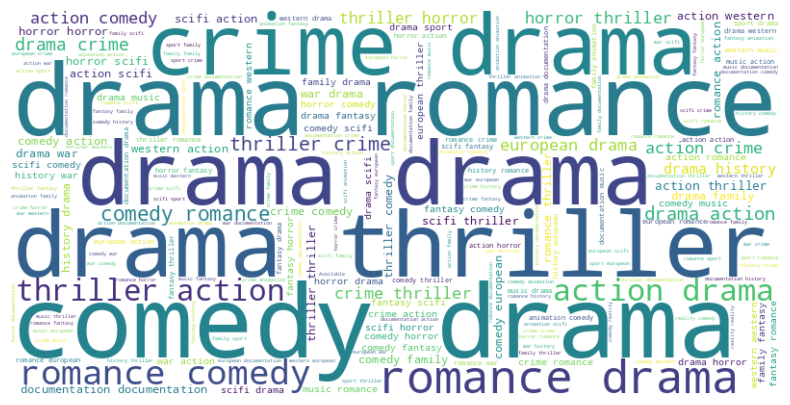

In [ ]:
genres_text = " ".join(merged_df['genres'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(genres_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


**So as we can see :- Crime, Drama, Thriller, Comedy, Romance, are some of the most prominent genres.**


---



Now we will Analyse "production_countries' Column and Create a Barplot to Visualize top 10 Countries that Produce most Shows/movies.

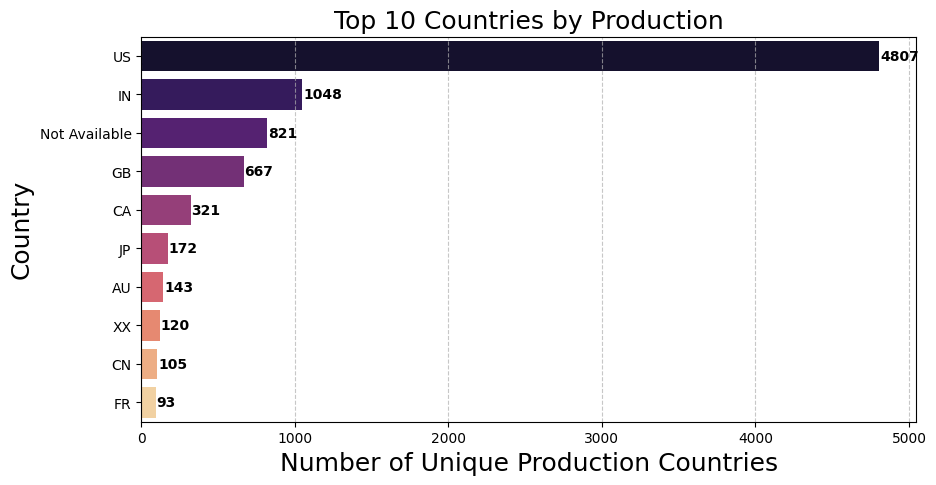

In [ ]:
production_countries_count = merged_df.groupby('production_countries')['id'].nunique().sort_values(ascending=False)
top_10_countries = production_countries_count.head(10) # Use .head(10) to get the top 10 countries

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top_10_countries.values, y=top_10_countries.index, hue=top_10_countries.index, palette="magma", legend=False)

for index, value in enumerate(top_10_countries.values):
    plt.text(value + 5, index, str(value), va='center', fontsize=10 , fontweight = 'bold')

plt.xlabel("Number of Unique Production Countries", fontsize=18)
plt.ylabel("Country", fontsize=18)
plt.title("Top 10 Countries by Production", fontsize=18)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

**As we can see , US that is United States of America dominates the Streaming Platform Amazon Prime with 4807 shows/movies produced by USA based Production houses.** Next in Line is India with 1048 Movies/Shows Produced by India based Production houses. 821 Shows?Movies has no Specific Country associated with it. And rest Countries follow.


---



**Next, we analyze four columns: 'imdb_score,' 'imdb_votes,' 'tmdb_popularity,' and 'tmdb_score.' We will examine what each of these represents.**


---



**Explanation of Each Column:**


---


**1.imdb_score –** The average rating of a movie on IMDb (Internet Movie Database), typically on a scale of 1 to 10, based on user reviews.

**2.imdb_votes –** The total number of votes a movie has received on IMDb, indicating how many users contributed to the rating.

**3.tmdb_popularity –** A popularity score assigned by TMDb (The Movie Database), which factors in search volume, page views, and other engagement metrics.

**4.tmdb_score –** The average user rating of a movie on TMDb, usually on a scale of 1 to 10, similar to IMDb's rating system.


---



1. I will now use both histograms and boxplots to Analyse different Failure types because they provide complementary insights.

2. Histograms show the frequency distribution, revealing the shape (normal, skewed, bimodal) and density of the data.

3. Boxplots, on the other hand, summarize the central tendency, variability, and outliers in a compact form. While histograms help visualize the overall distribution, boxplots make it easier to detect skewness and extreme values.

4. Using both ensures a more comprehensive univariate analysis.

Now , before Plotting the Histogram Plot , we need to decide the Bin Size. Their are various ways to decide Bin Size , but we will use Simple Square Root Rule to decide the Bin Size.

In [ ]:
import numpy as np

In [ ]:
print(int(np.sqrt(len(merged_df["imdb_score"].dropna().unique())))),
print(int(np.sqrt(len(merged_df["imdb_votes"].dropna().unique())))),
print(int(np.sqrt(len(merged_df["tmdb_popularity"].dropna().unique())))),
print(int(np.sqrt(len(merged_df["tmdb_score"].dropna().unique()))))

9
60
72
9


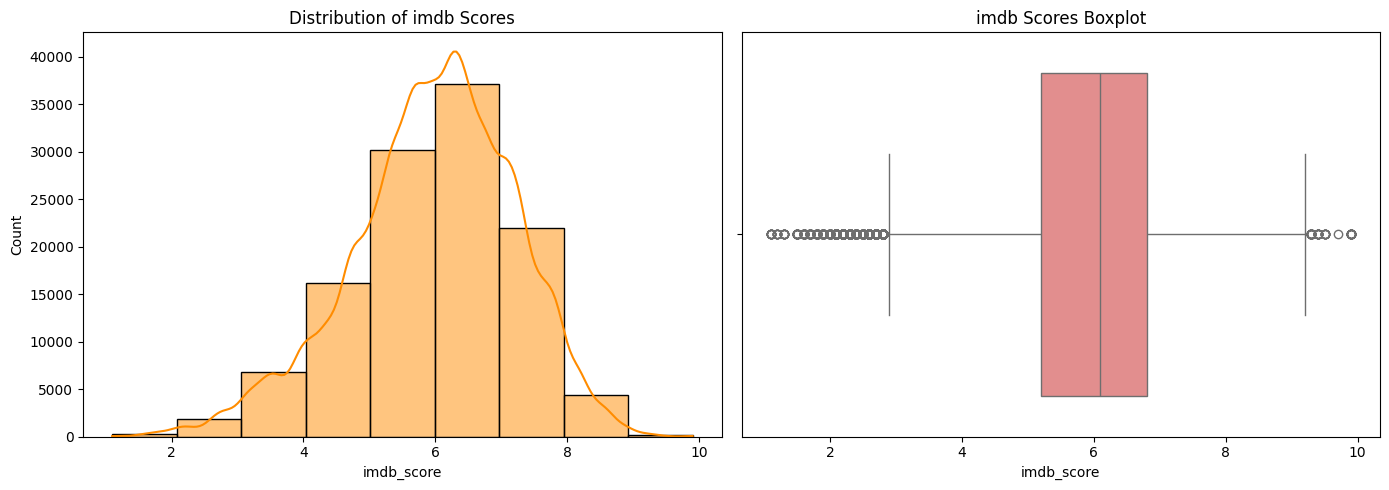

In [ ]:
# Set figure size and create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
sns.histplot(merged_df['imdb_score'].dropna(), bins=9, kde=True,color="darkorange", ax=axes[0])
axes[0].set_title("Distribution of imdb Scores")

# Boxplot
sns.boxplot(x=merged_df['imdb_score'], color="lightcoral" , ax=axes[1])
axes[1].set_title("imdb Scores Boxplot")

plt.tight_layout()
plt.show()

The left plot is a histogram overlaid with a KDE (Kernel Density Estimate) curve, representing the distribution of IMDb scores. The scores follow an approximately normal distribution, peaking around 6, with most values ranging between 4 and 8. The presence of a smooth KDE curve helps visualize the density of scores across the range.

The right plot is a boxplot, which displays the median IMDb score (around 6), the interquartile range (IQR) spanning from approximately 5 to 7, and whiskers extending to the lower and upper non-outlier values. Outliers are present below 3 and above 8, indicating some movies have exceptionally low or high ratings compared to the bulk of the data.

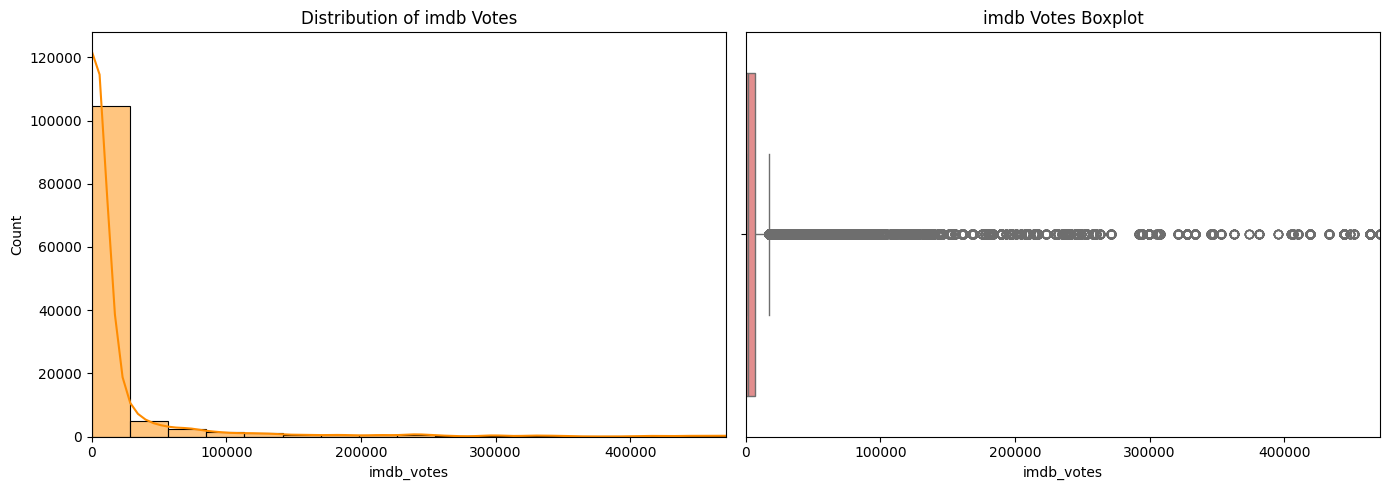

In [ ]:
# Set figure size and create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Get 99th percentile to avoid extreme outliers
vote_99th = np.percentile(merged_df['imdb_votes'].dropna(), 99)

# Histogram with improved bins and removing extreme outliers
sns.histplot(merged_df['imdb_votes'].dropna(), bins=40, kde=True, color="darkorange", ax=axes[0])
axes[0].set_title("Distribution of imdb Votes")
axes[0].set_xlim(0, vote_99th)  # Limit x-axis to avoid extreme values

# Boxplot
sns.boxplot(x=merged_df['imdb_votes'], color="lightcoral", ax=axes[1])
axes[1].set_title("imdb Votes Boxplot")
axes[1].set_xlim(0, vote_99th)  # Limit x-axis to 99th percentile

plt.tight_layout()
plt.show()

The left plot is a histogram with a KDE curve, showing the distribution of IMDb votes, which is highly right-skewed. Most movies have a low number of votes, with a sharp decline as the vote count increases, indicating that only a few movies receive an exceptionally high number of votes.

The right plot is a boxplot that highlights the extreme skewness, with a very small interquartile range (IQR) and numerous outliers extending far beyond the upper whisker. This suggests that while the majority of movies receive relatively few votes, a handful of popular movies accumulate significantly higher vote counts.

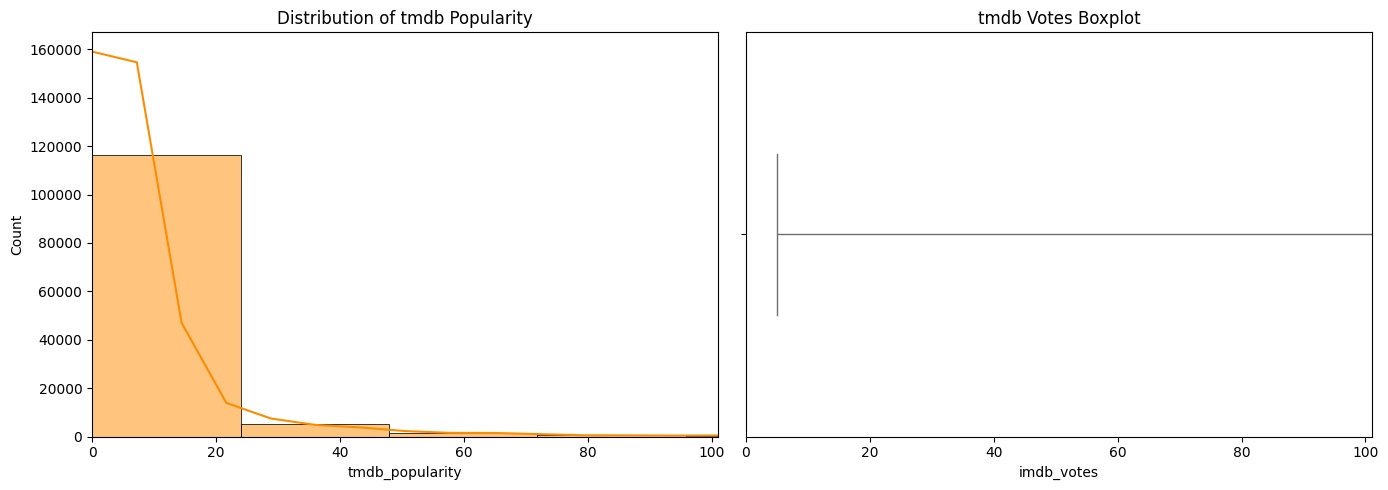

In [ ]:
# Set figure size and create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Get 99th percentile to avoid extreme outliers
vote_99th = np.percentile(merged_df['tmdb_popularity'].dropna(), 99)

# Histogram with improved bins and removing extreme outliers
sns.histplot(merged_df['tmdb_popularity'].dropna(), bins=60, kde=True, color="darkorange", ax=axes[0])
axes[0].set_title("Distribution of tmdb Popularity")
axes[0].set_xlim(0, vote_99th)  # Limit x-axis to avoid extreme values

# Boxplot
sns.boxplot(x=merged_df['imdb_votes'], color="lightcoral", ax=axes[1])
axes[1].set_title("tmdb Votes Boxplot")
axes[1].set_xlim(0, vote_99th)  # Limit x-axis to 99th percentile

plt.tight_layout()
plt.show()

The left plot is a histogram with a KDE curve, displaying the distribution of TMDb popularity scores, which is highly right-skewed. Most movies have very low popularity scores, with only a few achieving significantly high popularity, resulting in a sharp decline in frequency as the scores increase.

The right plot is a boxplot, Which is insignificant as The data is full of Outliers.








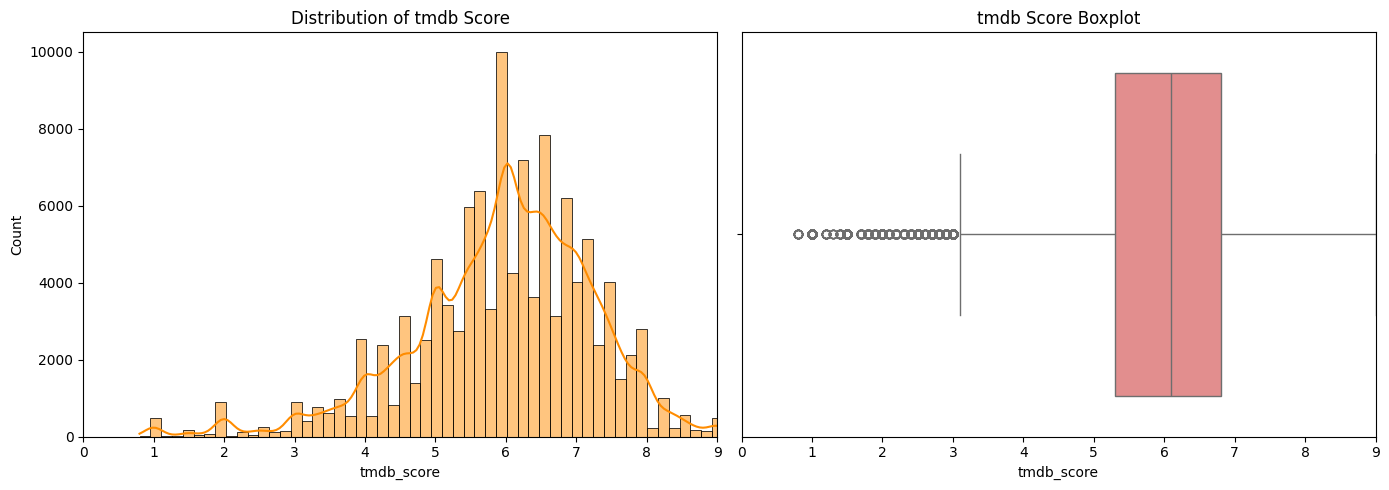

In [ ]:
# Set figure size and create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Get 99th percentile to avoid extreme outliers
vote_99th = np.percentile(merged_df['tmdb_score'].dropna(), 99)

# Histogram with improved bins and removing extreme outliers
sns.histplot(merged_df['tmdb_score'].dropna(), bins=60, kde=True, color="darkorange", ax=axes[0])
axes[0].set_title("Distribution of tmdb Score")
axes[0].set_xlim(0, vote_99th)  # Limit x-axis to avoid extreme values

# Boxplot
sns.boxplot(x=merged_df['tmdb_score'], color="lightcoral", ax=axes[1])
axes[1].set_title("tmdb Score Boxplot")
axes[1].set_xlim(0, vote_99th)  # Limit x-axis to 99th percentile

plt.tight_layout()
plt.show()

The left plot is a histogram with a KDE curve, showing the distribution of TMDb scores, which appears to be approximately normal with a peak around 6. The majority of movies have scores between 5 and 7, with fewer movies receiving extremely low or high ratings.

The right plot is a boxplot of TMDb scores, indicating a median score close to 6, with an interquartile range (IQR) spanning from approximately 5 to 7. The presence of several outliers below 4 suggests that some movies received exceptionally low scores, while the upper range appears well-contained without extreme outliers.



---



Next we analyse "name" Column. It gives the Name of Actors whoe have acted in Shows and Movies. We will use this Column to Visualize top 20 Actors who have Acted in Most Shows/Movies.

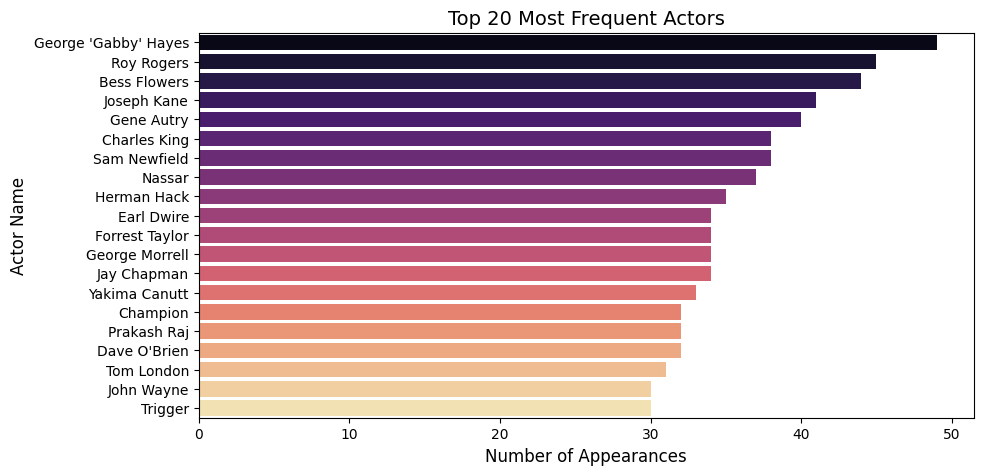

In [ ]:
actor_list = merged_df["name"].dropna()
top_actors = actor_list.value_counts().head(20)

plt.figure(figsize=(10,5))
sns.barplot(x=top_actors.values, y=top_actors.index, palette="magma")
plt.title("Top 20 Most Frequent Actors", fontsize=14)
plt.xlabel("Number of Appearances", fontsize=12)
plt.ylabel("Actor Name", fontsize=12)
plt.show()

The graph is self-explanatory and shows the names of the top 20 actors who have appeared in the most movies and shows.



---



Next we will analyse "role" Column. We will Create a Pie Chart to Visualize the "role" Column.

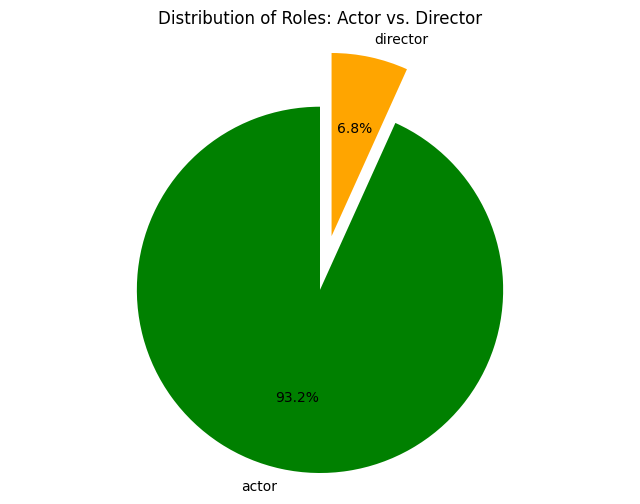

In [ ]:
merged_df['role'] = merged_df['role'].fillna('Unknown').str.lower().str.strip()
role_counts = merged_df['role'].value_counts()
roles_to_plot = role_counts[role_counts.index.isin(['actor', 'director'])]

# Check if there is valid data before plotting
if not roles_to_plot.empty:
    # Dynamically create explode values (example: 10% for 'actor', 20% for 'director')
    explode = (0.1, 0.2) if len(roles_to_plot) == 2 else (0.1,)  # Adjust as needed

    plt.figure(figsize=(8, 6))
    plt.pie(roles_to_plot, labels=roles_to_plot.index, autopct='%1.1f%%',
            startangle=90, colors=['green', 'orange'], explode=explode)
    plt.title('Distribution of Roles: Actor vs. Director')
    plt.axis('equal')  # Ensures the pie chart is a perfect circle
    plt.show()
else:
    print("No data available for 'actor' and 'director' roles.")

This pie chart represents the distribution of roles between actors and directors. The majority (93.2%) belong to actors, shown in green, while only 6.8% are directors, represented in orange. The chart highlights the significant dominance of actors compared to directors in the dataset, which is obvious.


---



**We Conclude Our Univariate Analysis. We will Continue with Bivariate and Multi-Variate Analysis.**



---



## **Bi-Variate & Multi-Variate Analysis**

---

We will Analyse with help of Barplot as to which among between Show's and Movie's has highest Average imdb_Scores.

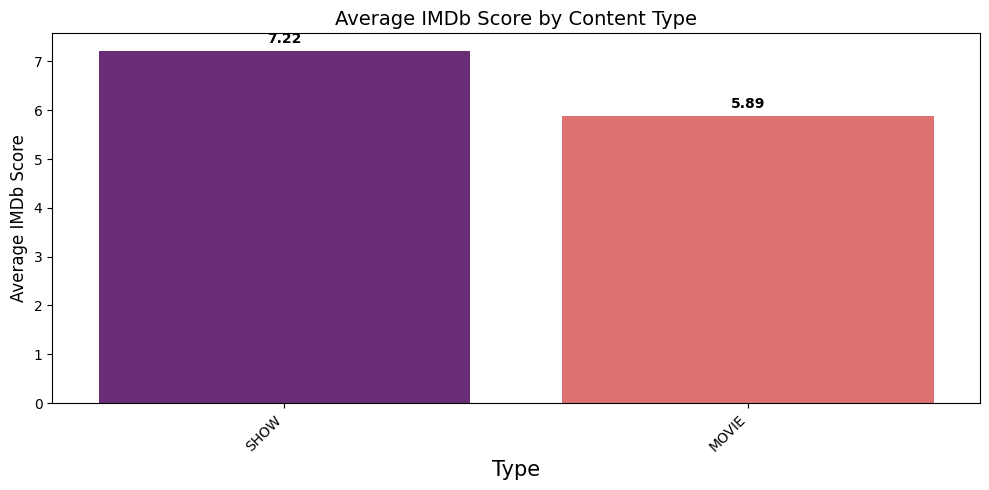

In [ ]:
merged_df_clean = merged_df.dropna(subset=["imdb_score"])
avg_imdb_type = merged_df_clean.groupby("type")["imdb_score"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_imdb_type.index, y=avg_imdb_type.values, palette="magma")

plt.xlabel("Type", fontsize=15)
plt.ylabel("Average IMDb Score", fontsize=12)
plt.title("Average IMDb Score by Content Type", fontsize=14)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(avg_imdb_type.values):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', va='bottom', fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()

**The above graph shows us that TV shows tend to have higher IMDb scores on average than movies.**



---



Next we will Analyse Runtime trend Over the Years.

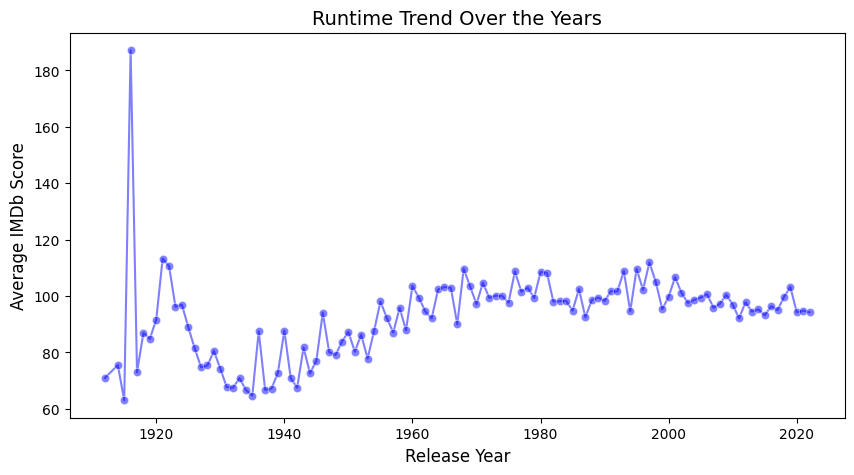

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x=merged_df["release_year"], y=merged_df["runtime"], ci=None, color="blue", marker="o", alpha=0.5)
plt.title("Runtime Trend Over the Years", fontsize=14)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Average IMDb Score", fontsize=12)
plt.show()

**The above Line Chart tells us that before 1940's the Movies/Shows had slightly greater Runtime . After 1940's the Runtime seems to be in range of 80-120 minutes with a very slight bump in Runtime in 1980's. The Recent Years have Shown a Steady Runtime.**



---



Next we will analyse imdb_score trend Over the Years.

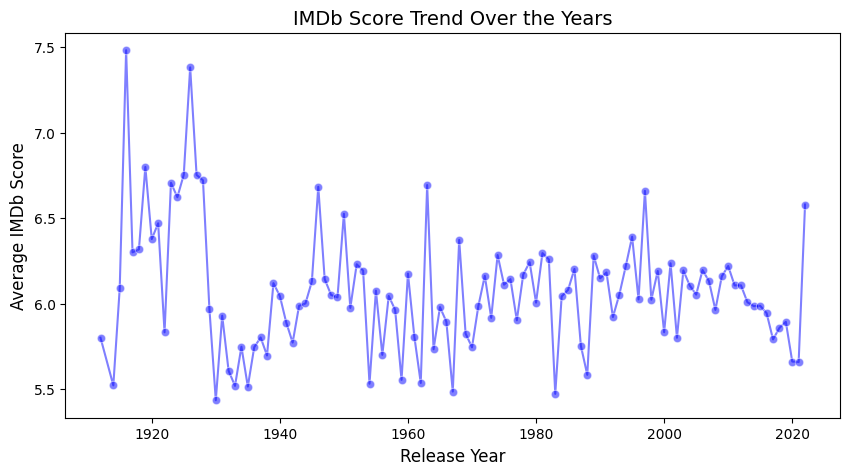

In [ ]:
# Insight 10: IMDb Score vs. Release Year (Trend Over Time)

plt.figure(figsize=(10,5))
sns.lineplot(x=merged_df["release_year"], y=merged_df["imdb_score"], ci=None, color="blue", marker="o", alpha=0.5)
plt.title("IMDb Score Trend Over the Years", fontsize=14)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Average IMDb Score", fontsize=12)
plt.show()

**The trend fluctuates significantly, especially in the earlier years (before 1940), with some peaks reaching around 7.5. From 1940 onward, the scores appear to stabilize, though there are still periodic rises and dips. The trend suggests that earlier movies had more variation in IMDb scores, whereas more recent decades have a more consistent average rating. There is a slight decline in scores after 2010, possibly indicating changing audience preferences or rating behaviors.**



---



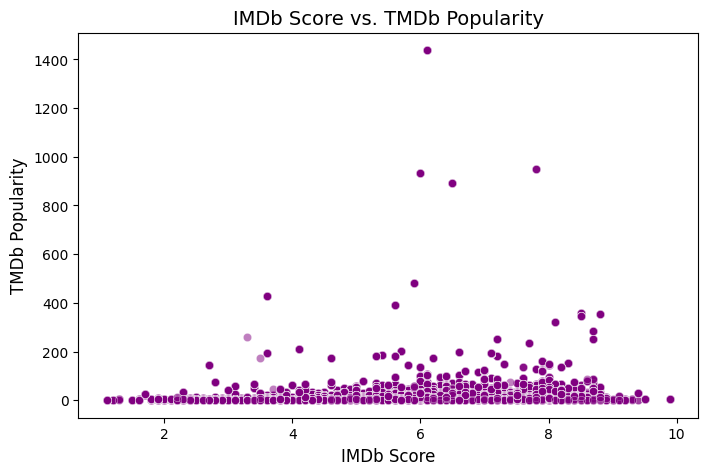

In [ ]:
# Insight 6: Relationship between IMDb Score and TMDb Popularity

plt.figure(figsize=(8,5))
sns.scatterplot(x=merged_df["imdb_score"], y=merged_df["tmdb_popularity"], alpha=0.5, color="purple")
plt.title("IMDb Score vs. TMDb Popularity", fontsize=14)
plt.xlabel("IMDb Score", fontsize=12)
plt.ylabel("TMDb Popularity", fontsize=12)
plt.show()

**This scatter plot visualizes the relationship between IMDb scores and TMDb popularity. The majority of data points are clustered near the bottom, suggesting that most movies have relatively low popularity scores, regardless of their IMDb rating. However, a few movies with IMDb scores around 6-8 exhibit exceptionally high TMDb popularity values (above 1000), indicating that popularity doesn't always correlate with high IMDb scores. There is no clear linear relationship, but some highly popular movies have mid-range IMDb scores rather than the highest ratings.**



---



**Next we will Visualize top 10 Movies with highest imdb Scores. we will use lollipop Chart to Visualize the Same.**

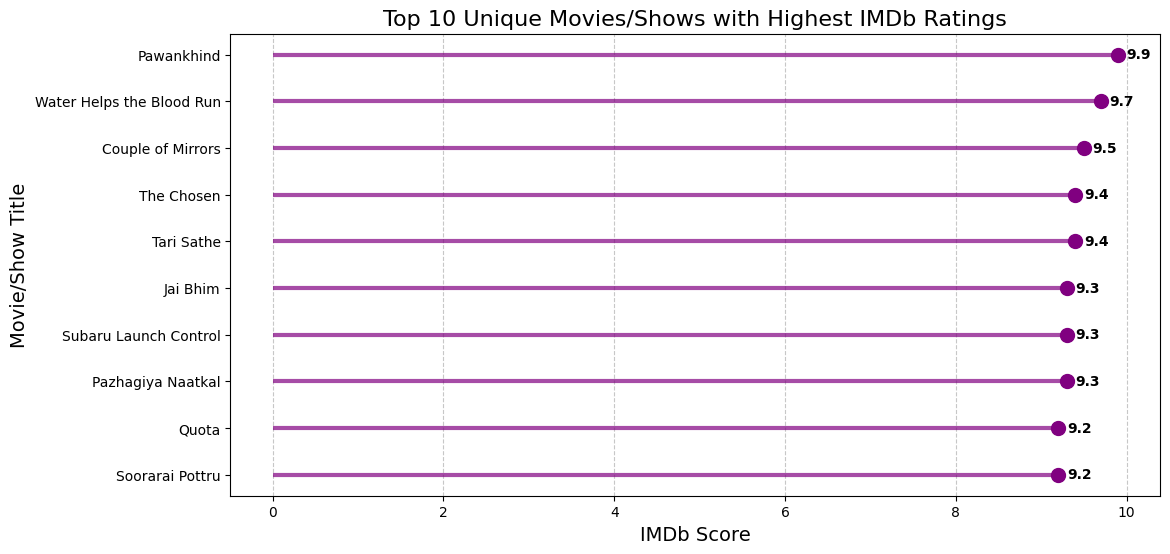

In [ ]:
unique_movies = merged_df.sort_values(by='imdb_score', ascending=False).drop_duplicates(subset='title')

top_10_movies = unique_movies.nlargest(10, 'imdb_score')[['title', 'imdb_score']].reset_index(drop=True)

top_10_movies = top_10_movies.sort_values(by='imdb_score', ascending=True)

plt.figure(figsize=(12, 6))

y_positions = range(len(top_10_movies))

plt.hlines(y=y_positions, xmin=0, xmax=top_10_movies['imdb_score'], color='purple', alpha=0.7, linewidth=3)

plt.scatter(top_10_movies['imdb_score'], y_positions, color='purple', s=100)

for score, y_pos in zip(top_10_movies['imdb_score'], y_positions):
    plt.text(score + 0.1, y_pos, f"{score:.1f}", va='center', fontsize=10, fontweight="bold", ha='left')

plt.yticks(y_positions, top_10_movies['title'])

plt.xlabel("IMDb Score", fontsize=14)
plt.ylabel("Movie/Show Title", fontsize=14)
plt.title("Top 10 Unique Movies/Shows with Highest IMDb Ratings", fontsize=16)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

The above lollipop Gives us Top ten Movies/Shows with Highest imdb Scores

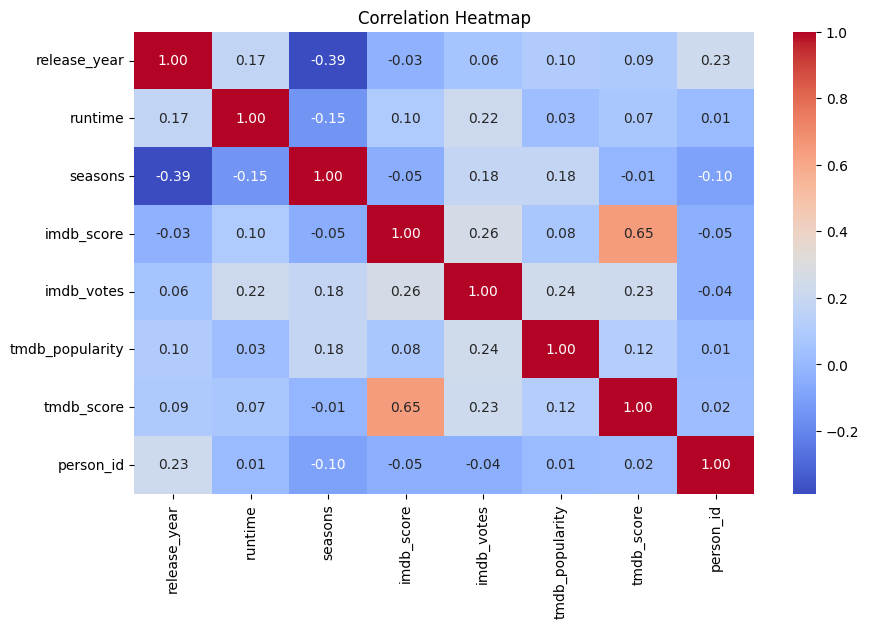

In [ ]:
plt.figure(figsize=(10,6))
numeric_df = merged_df.select_dtypes(include=np.number)  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Key Insights from the Correlation Heatmap:**


---


**Strong Positive Correlation (0.65) Between IMDb Score and TMDb Score :-**


---



This suggests that movies that have high ratings on IMDb also tend to have high ratings on TMDb, indicating consistency between the two platforms.


**Moderate Positive Correlation (0.26) Between IMDb Votes and IMDb Score :-**


---



Movies with a higher number of votes on IMDb generally have slightly better ratings, but the correlation is not very strong.


**Weak Positive Correlation Between IMDb Votes and TMDb Popularity (0.23) :-**


---



More votes on IMDb slightly contribute to a movie's popularity on TMDb, but other factors likely influence popularity more.


**Negative Correlation (-0.39) Between Seasons and Release Year :-**


---



Older series tend to have more seasons, which makes sense since long-running shows started years ago.


**Weak Correlation Between Runtime and Ratings/Popularity :-**


---



Runtime has minimal impact on IMDb/TMDb scores or popularity, indicating that longer movies or shows don’t necessarily receive higher ratings.


**Insignificant Correlation of Person ID with Other Features :-**.


---



The person_id variable doesn’t strongly correlate with any other metric, meaning the involvement of a specific person (director/actor) doesn’t strongly dictate scores or popularity.

## **Summary of EDA report**

---

**1. Univariate Analysis :-**
The dataset contains 8,511 unique movies and 1,357 TV shows.
Release Year Distribution:
Movies and shows span from the early 1900s to the 2020s.
The number of releases increased significantly from the 2000s onwards.
A peak in content production is observed post-2010.

**2. Genre Analysis :-**
The most common genres include Drama, Comedy, and Documentary.
Action and Thriller genres are also significant but less frequent compared to Drama.
The dataset has a diverse mix of genres.

**3. IMDb Ratings :-**
Distribution of IMDb ratings shows that most content falls between 5 to 8.
Few movies have ratings below 4 or above 9, indicating a general trend of moderate to high ratings.


**4. Duration Analysis :-**
Movies generally have durations between 80 to 120 minutes.
Shows vary in episode duration but tend to be around 40-60 minutes per episode.

**5. Language Distribution :-**
The majority of content is in English, with some presence of foreign-language films and shows.

**6. Top Production Countries :-**
The USA dominates in content production, followed by India, the UK, and Canada.


---



**Key Insights :-
Significant growth in content post-2000, with peak releases after 2010.
Drama and Comedy are the dominant genres.
English-language content is the majority.
Most content has IMDb ratings between 5-8, suggesting moderate audience reception.**